---

# IT00CJ42: Search and Optimization Algorithms

**Restart the kernel and run all cells** before you turn this problem in, make sure everything runs as expected.

Make sure you fill in any place that says `YOUR CODE HERE`.

---

## Miniproject 1: Ground Collision Avoidance System

The F-16 Fighting Falcon is a highly-maneuverable aircraft in production since the 1970s. Since then, several studies and books have investigated the aircraft’s performance and created simulation models. There are computer programs in MATLAB and Python implementing the flight model and autonomous maneuvers. The aircraft model and inner-loop controller has 16 continuous variables with piecewise nonlinear differential equations.

![GCAS](https://raw.githubusercontent.com/stanleybak/AeroBenchVVPython/master/anim3d.gif)


The Python function gcas_simulation accepts as parameters the roll, pitch,  yaw and altitude of the plane and performs a simulation of the ground collision avoidance manoeuvre. It returns a list with the plane altitude during the simulation. Our objective is the minimum altitude during the simulation. If it is equal or lower than 0 then the plane has crashed into the ground.

Function gcas_simulation

Input
* Roll angle from wings level (radians), valid range [0.2 * pi, 0.2833 * pi]
* Pitch angle from nose level (radians), valid range [-0.4 * pi, -0.35 * pi]
* Yaw angle from North (radians), valid range [-0.375 * pi, -0.125 * pi]
* Initial altitude (meters) is set to 2400.

Output:
* A list of the altitudes during the simulation

**Your task is to create a Python program to find a test that  makes the gcas algorithm to fail. That is find at least one combination of roll, pitch and yaw values tat make minimum altitude during the simulation equal or below zero. Do this with any metaheuristic of your choosing.**

### Imports

In [1]:
import sys

sys.path.insert(1, '../res/aerobench/')

from run_f16_sim import gcas_simulation
import math
import numpy as np
import matplotlib.pyplot as plt

### Solutions check
We use the function **check** to implement tests for your solution

In [2]:
def check(expression, message=""):
    if not expression:
        raise AssertionError(message)
    return "Passed"

### Example

In [3]:
# Example parameters
phi = 0.21 * math.pi
theta = -0.38 * math.pi
psi = -0.35 * math.pi

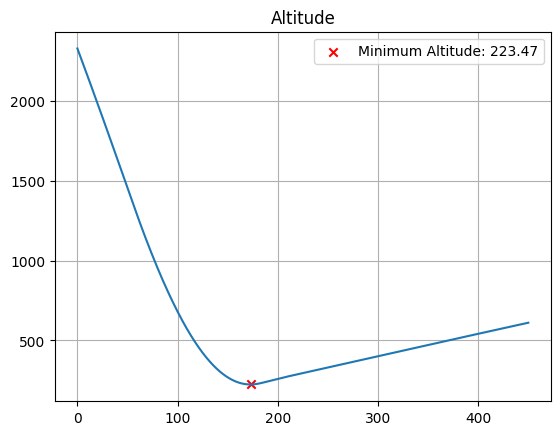

Minimum altitude 223.47
Did not crash into the ground.


In [4]:
result = gcas_simulation(phi, theta, psi)
minimum_alt = min(result)

marker = np.unravel_index(np.argmin(result, axis=None), result.shape)[0]
plt.scatter(marker, minimum_alt, marker='x', color='red', label=f'Minimum Altitude: {round(minimum_alt, 2)}')

plt.plot(result)
plt.grid()
plt.title("Altitude")
plt.legend()
plt.show()

print("Minimum altitude", round(minimum_alt, 2))
if minimum_alt <= 0:
    print("Crashed into the ground.")
else:
    print("Did not crash into the ground.")

### Solution
#### Find values of *phi*, *theta*, *psi* such the plane crashes into the ground using a metaheuristic.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import random


def simulated_annealing():
    pi = math.pi
    temperature = 1.0
    cooling_rate = 0.99
    min_temperature = 0.001

    # Initialize the counter for the number of calls to gcas_simulation
    num_calls = 0

    # Initial solution
    current_solution = (random.uniform(0.2 * pi, 0.2833 * pi),
                        random.uniform(-0.4 * pi, -0.35 * pi),
                        random.uniform(-0.375 * pi, -0.125 * pi))
    current_altitudes = gcas_simulation(*current_solution)
    current_min_altitude = min(current_altitudes)

    # Increment the counter
    num_calls += 1

    best_solution = current_solution
    best_min_altitude = current_min_altitude

    while temperature > min_temperature:
        # Generate neighbor by tweaking the current solution slightly
        neighbor = (current_solution[0] + random.uniform(-0.01, 0.01) * pi,
                    current_solution[1] + random.uniform(-0.01, 0.01) * pi,
                    current_solution[2] + random.uniform(-0.01, 0.01) * pi)

        # Ensure neighbor is within bounds
        neighbor = (max(min(neighbor[0], 0.2833 * pi), 0.2 * pi),
                    max(min(neighbor[1], -0.35 * pi), -0.4 * pi),
                    max(min(neighbor[2], -0.125 * pi), -0.375 * pi))

        altitudes = gcas_simulation(*neighbor)
        min_altitude = min(altitudes)

        # Increment the counter
        num_calls += 1

        # Acceptance probability
        if min_altitude < current_min_altitude or np.exp(
                (current_min_altitude - min_altitude) / temperature) > random.random():
            current_solution = neighbor
            current_min_altitude = min_altitude

            if min_altitude < best_min_altitude:
                best_solution = neighbor
                best_min_altitude = min_altitude

        temperature *= cooling_rate

    return best_solution, best_min_altitude, num_calls


phi, theta, psi = simulated_annealing()[0]
print(f"phi: {phi}, theta: {theta}, psi: {psi}")

phi: 0.8662485148101808, theta: -1.2566370614359172, psi: -1.1750390648304647


#### Check the solution

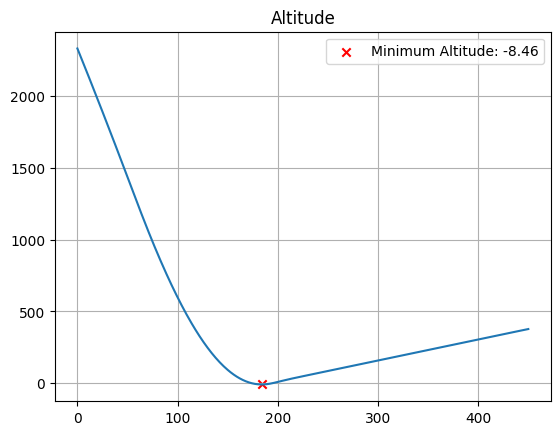

'Passed'

In [6]:
# Make your function return the three values: phi, theta and psi.
# Insert them into the gcas simulator function below.
result = gcas_simulation(phi, theta, psi)
minimum_alt = min(result)

marker = np.unravel_index(np.argmin(result, axis=None), result.shape)[0]
plt.scatter(marker, minimum_alt, marker='x', color='red', label=f'Minimum Altitude: {round(minimum_alt, 2)}')

plt.plot(result)
plt.grid()
plt.title("Altitude")
plt.legend()
plt.show()

check(minimum_alt <= 0, "Did not crash into the ground.")

### Why Simulated Annealing?
Simulated Annealing (SA) was chosen due to its effectiveness in exploring complex solution spaces and its ability to escape local optima. SA is particularly suited for this problem because:
- It allows for a broad exploration of the solution space at higher "temperatures" and gradually focuses on exploiting the best solutions found as the "temperature" decreases.
- The problem of finding a failing test case for the GCAS simulation likely involves navigating a complex and potentially rugged landscape of solutions, making SA's ability to jump out of local optima valuable.
